In [1]:
# import packages
def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))

import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy.special import erf
from scipy import integrate
from scipy.integrate import quad, dblquad
from scipy.integrate import simps



In [2]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [3]:
simulation_color = green3

### Blood 

In [6]:
# Import simulated data

# simulated_data = 'Simulated_correlation_plot_Bolton_ages_590_samples.csv'
simulated_data = 'Simulated_correlation_plot_Bolton_ages_1180_samples.csv'

trimmed_fmin=2/100
trimmed_fmax=0.5
list_largest_driver_VAF_in_order = []
list_largest_neutral_VAF_in_order = []
with open(simulated_data) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        largest_driver_vaf = float(row[0])
        largest_neutral_vaf = float(row[1])
        cooccurrence = str(row[2])
            
        if trimmed_fmin < largest_neutral_vaf < trimmed_fmax:
            list_largest_neutral_VAF_in_order.append(largest_neutral_vaf)
            
            if trimmed_fmin < largest_driver_vaf < trimmed_fmax:
                list_largest_driver_VAF_in_order.append(largest_driver_vaf)
            else:
                list_largest_driver_VAF_in_order.append(0)
            


In 15 pairs of data there is a larger nonsyn clone than the largest syn clone
total number of pairs of data is 18


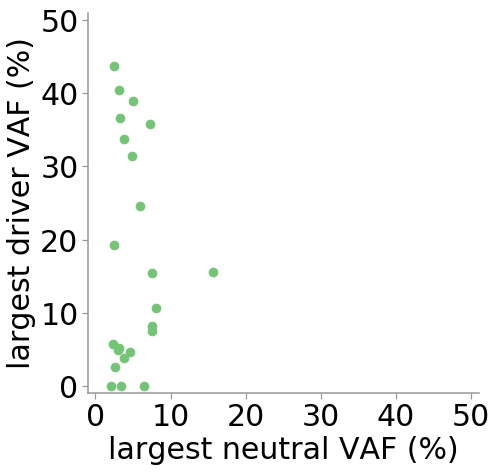

In [8]:
# correlat|ion plot

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)


ax.scatter(list_largest_neutral_VAF_in_order, list_largest_driver_VAF_in_order, marker='o',  color=simulation_color, s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')

num_nonsyn_larger=0
num_syn_larger=0
for index in range(len(list_largest_neutral_VAF_in_order)):
    syn_vaf=list_largest_neutral_VAF_in_order[index]
    nonsyn_vaf=list_largest_driver_VAF_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_nonsyn_larger=num_nonsyn_larger+1
    if nonsyn_vaf< syn_vaf:
        num_syn_larger=num_syn_larger+1
print('In', num_nonsyn_larger, 'pairs of data there is a larger nonsyn clone than the largest syn clone')
print('total number of pairs of data is', num_nonsyn_larger+num_syn_larger)


ax.set_xlabel('largest neutral VAF (%)', fontsize=30)
ax.set_ylabel('largest driver VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

    # the predicted plot
# plt.savefig('simulated_correlation_plot_blood.pdf', bbox_inches='tight')

In [9]:
# Import simulated data

# simulated_data = 'Simulated_correlation_plot_Bolton_ages_logconvex_p2_unseen_drivers_lower_mut_rate.csv'
# simulated_data = 'simulated_correlation_plot_Bolton_ages_logconvex_p2_unseen_drivers_5x_rate_combined.csv'
simulated_data = 'simulated_correlation_plot_Bolton_ages_logconvex_p2_unseen_drivers_5x_rate_combined_1180_samples.csv'

trimmed_fmin=2/100
trimmed_fmax=0.5
list_largest_driver_VAF_in_order = []
list_largest_neutral_VAF_in_order = []
with open(simulated_data) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        largest_driver_vaf = float(row[0])
        largest_neutral_vaf = float(row[1])
        cooccurrence = str(row[2])
            
        if trimmed_fmin < largest_neutral_vaf < trimmed_fmax:
            list_largest_neutral_VAF_in_order.append(largest_neutral_vaf)
            
            if trimmed_fmin < largest_driver_vaf < trimmed_fmax:
                list_largest_driver_VAF_in_order.append(largest_driver_vaf)
            else:
                list_largest_driver_VAF_in_order.append(0)


In 20 pairs of data there is a larger nonsyn clone than the largest syn clone
total number of pairs of data is 63


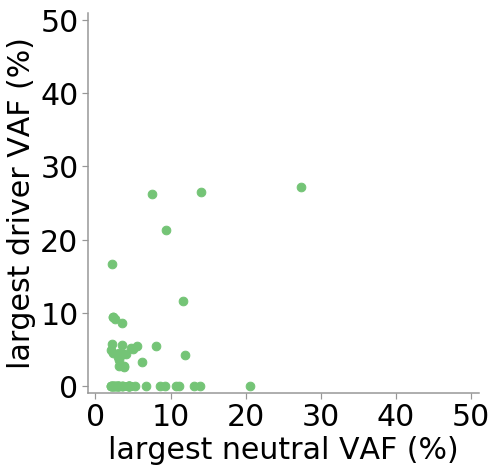

In [11]:
# correlat|ion plot

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)


ax.scatter(list_largest_neutral_VAF_in_order, list_largest_driver_VAF_in_order, marker='o',  color=simulation_color, s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')

num_nonsyn_larger=0
num_syn_larger=0
for index in range(len(list_largest_neutral_VAF_in_order)):
    syn_vaf=list_largest_neutral_VAF_in_order[index]
    nonsyn_vaf=list_largest_driver_VAF_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_nonsyn_larger=num_nonsyn_larger+1
    if nonsyn_vaf< syn_vaf:
        num_syn_larger=num_syn_larger+1
print('In', num_nonsyn_larger, 'pairs of data there is a larger nonsyn clone than the largest syn clone')
print('total number of pairs of data is', num_nonsyn_larger+num_syn_larger)

ax.set_xlabel('largest neutral VAF (%)', fontsize=30)
ax.set_ylabel('largest driver VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('simulated_correlation_plot_blood_unseen_drivers.pdf', bbox_inches='tight')

### oesophagus 

In [12]:
# Import simulated data

# simulated_data = 'Simulated_correlation_plot_Martincorena_ages_844_samples.csv'
simulated_data = 'Simulated_correlation_plot_Martincorena_ages_1688_samples.csv'

trimmed_fmin=1/100
trimmed_fmax=0.5
list_largest_driver_VAF_in_order = []
list_largest_neutral_VAF_in_order = []
with open(simulated_data) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        largest_driver_vaf = float(row[0])
        largest_neutral_vaf = float(row[1])
        cooccurrence = str(row[2])
            
        if trimmed_fmin < largest_neutral_vaf < trimmed_fmax:
            list_largest_neutral_VAF_in_order.append(largest_neutral_vaf)
            
            if trimmed_fmin < largest_driver_vaf < trimmed_fmax:
                list_largest_driver_VAF_in_order.append(largest_driver_vaf)
            else:
                list_largest_driver_VAF_in_order.append(0)

In 67 pairs of data there is a larger nonsyn clone than the largest syn clone
total number of pairs of data is 70


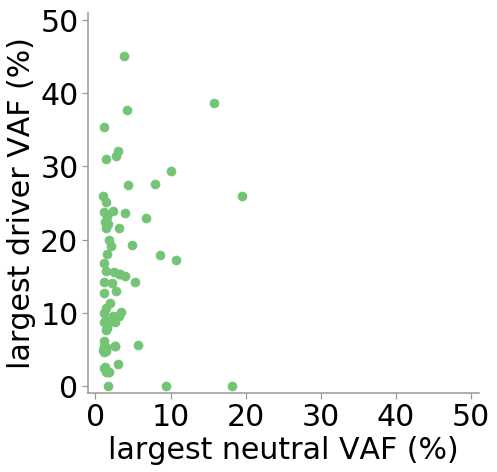

In [14]:
# correlat|ion plot

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)


ax.scatter(list_largest_neutral_VAF_in_order, list_largest_driver_VAF_in_order, marker='o',  color=simulation_color, s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')

num_nonsyn_larger=0
num_syn_larger=0
for index in range(len(list_largest_neutral_VAF_in_order)):
    syn_vaf=list_largest_neutral_VAF_in_order[index]
    nonsyn_vaf=list_largest_driver_VAF_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_nonsyn_larger=num_nonsyn_larger+1
    if nonsyn_vaf< syn_vaf:
        num_syn_larger=num_syn_larger+1
print('In', num_nonsyn_larger, 'pairs of data there is a larger nonsyn clone than the largest syn clone')
print('total number of pairs of data is', num_nonsyn_larger+num_syn_larger)

ax.set_xlabel('largest neutral VAF (%)', fontsize=30)
ax.set_ylabel('largest driver VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('simulated_correlation_plot_oesophagus.pdf', bbox_inches='tight')

In [4]:
# Import simulated data

# simulated_data = 'simulated_correlation_plot_Martincorena_ages_unseen_drivers.csv'
simulated_data = 'simulated_correlation_plot_Martincorena_ages_unseen_drivers_1688_samples.csv'

trimmed_fmin=1/100
trimmed_fmax=0.5
list_largest_driver_VAF_in_order = []
list_largest_neutral_VAF_in_order = []
with open(simulated_data) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        largest_driver_vaf = float(row[0])
        largest_neutral_vaf = float(row[1])
        cooccurrence = str(row[2])
            
        if trimmed_fmin < largest_neutral_vaf < trimmed_fmax:
            list_largest_neutral_VAF_in_order.append(largest_neutral_vaf)
            
            if trimmed_fmin < largest_driver_vaf < trimmed_fmax:
                list_largest_driver_VAF_in_order.append(largest_driver_vaf)
            else:
                list_largest_driver_VAF_in_order.append(0)

In 74 pairs of data there is a larger nonsyn clone than the largest syn clone
total number of pairs of data is 81


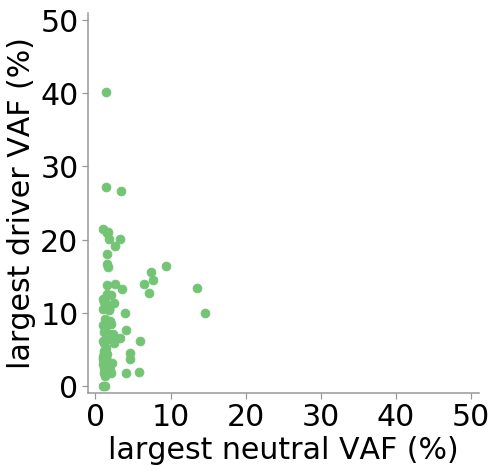

In [6]:
# correlat|ion plot

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)


ax.scatter(list_largest_neutral_VAF_in_order, list_largest_driver_VAF_in_order, marker='o',  color=simulation_color, s=75, zorder=1)
# x_vector=np.linspace(trimmed_fmin, trimmed_fmax, 100)
# y_vector=x_vector
# ax.plot(x_vector, y_vector, zorder=0, color='black')

num_nonsyn_larger=0
num_syn_larger=0
for index in range(len(list_largest_neutral_VAF_in_order)):
    syn_vaf=list_largest_neutral_VAF_in_order[index]
    nonsyn_vaf=list_largest_driver_VAF_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_nonsyn_larger=num_nonsyn_larger+1
    if nonsyn_vaf< syn_vaf:
        num_syn_larger=num_syn_larger+1
print('In', num_nonsyn_larger, 'pairs of data there is a larger nonsyn clone than the largest syn clone')
print('total number of pairs of data is', num_nonsyn_larger+num_syn_larger)

ax.set_xlabel('largest neutral VAF (%)', fontsize=30)
ax.set_ylabel('largest driver VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('simulated_correlation_plot_oesophagus_unseen_drivers.pdf', bbox_inches='tight')